In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
import math

In [2]:
# Load data
data_df = pd.read_csv("C:\\cse\\datasets\\prices-split-adjusted - prices-split-adjusted.csv", index_col=0)
data_df = data_df[data_df.symbol == 'AAPL'].drop(['symbol'], axis=1)


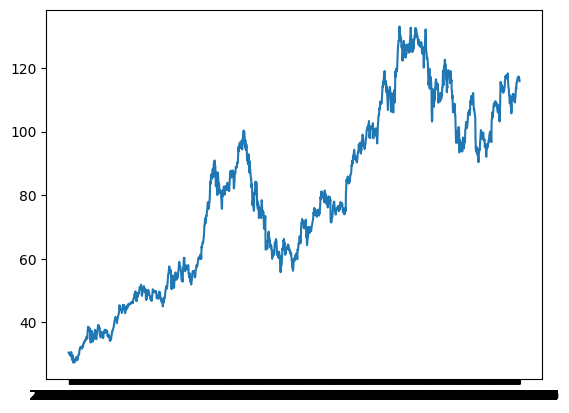

In [3]:
# Plot closing prices
plt.plot(data_df['close'])
plt.show()


In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(data_df['close'].values.reshape(-1, 1))


In [5]:
def create_dataset(data, look_back=15):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)


In [6]:
look_back = 15
X, Y = create_dataset(dataset, look_back)

In [7]:
# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle=False)
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [8]:
# Build and train LSTM model
model = Sequential()
model.add(LSTM(20, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=20, batch_size=1, verbose=2)



Epoch 1/20

1222/1222 - 8s - loss: 0.0017 - 8s/epoch - 6ms/step
Epoch 2/20
1222/1222 - 3s - loss: 5.5751e-04 - 3s/epoch - 2ms/step
Epoch 3/20
1222/1222 - 3s - loss: 5.0011e-04 - 3s/epoch - 2ms/step
Epoch 4/20
1222/1222 - 3s - loss: 4.1970e-04 - 3s/epoch - 2ms/step
Epoch 5/20
1222/1222 - 3s - loss: 3.7250e-04 - 3s/epoch - 2ms/step
Epoch 6/20
1222/1222 - 3s - loss: 3.7251e-04 - 3s/epoch - 2ms/step
Epoch 7/20
1222/1222 - 3s - loss: 2.9891e-04 - 3s/epoch - 2ms/step
Epoch 8/20
1222/1222 - 3s - loss: 2.8925e-04 - 3s/epoch - 3ms/step
Epoch 9/20
1222/1222 - 3s - loss: 3.1070e-04 - 3s/epoch - 2ms/step
Epoch 10/20
1222/1222 - 3s - loss: 2.9406e-04 - 3s/epoch - 3ms/step
Epoch 11/20
1222/1222 - 3s - loss: 3.0245e-04 - 3s/epoch - 2ms/step
Epoch 12/20
1222/1222 - 3s - loss: 2.4362e-04 - 3s/epoch - 2ms/step
Epoch 13/20
1222/1222 - 4s - loss: 2.4282e-04 - 4s/epoch - 3ms/step
Epoch 14/20
1222/1222 - 5s - loss: 2.3750e-04 - 5s/epoch - 4ms/step
Epoch 15/20
1222/1222 - 4s - loss: 2.5019e-04 - 4s/epoch -

In [9]:
# Predict
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)


17/17 [==============================] - 0s 4ms/step


In [10]:
# Invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)
y_train_inv = scaler.inverse_transform([y_train])
y_test_inv = scaler.inverse_transform([y_test])


In [11]:
# Calculate RMSE
trainScore = math.sqrt(mean_squared_error(y_train_inv[0], trainPredict[:, 0]))
testScore = math.sqrt(mean_squared_error(y_test_inv[0], testPredict[:, 0]))
print('Train Score: %.2f RMSE' % trainScore)
print('Test Score: %.2f RMSE' % testScore)


Train Score: 1.44 RMSE
Test Score: 2.07 RMSE


In [12]:

# Plot results
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict) + look_back, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (look_back * 2):len(dataset) - 1, :] = testPredict[:len(dataset) - len(trainPredict) - (look_back * 2) - 1]

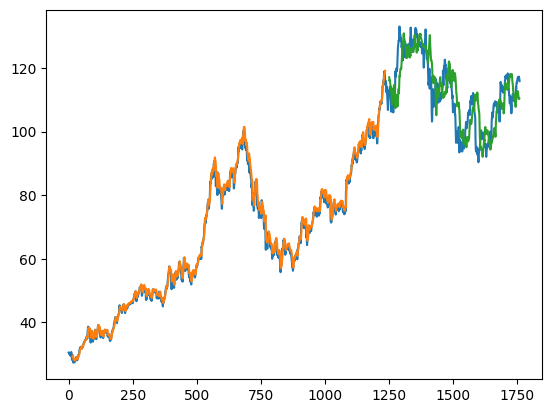

In [13]:
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()